# Data Visualisation with Matplotlib

## Introduction to Matplotlib

#### Learning Objectives
- What is Matplotlib and why is it so useful?
- What is the Matplotlib figure object? How do we use it?
- How to do basic plotting and visualisations (via Pandas)
    - boxplots, barcharts, line plots, scatterplots, histograms
- Learn about customising various aesthetics
    - axes, labels, colour, legends, subplots
- Challenge: try to make the most interesting plot with the most customisations!

In [1]:
# Importing Numpy, Matplotlib and Pandas (with nicknames!) so that we can use them

import pandas as pd
import matplotlib as mpl
import matplotlib.pyplot as plt
import numpy as np

# Making sure random number generators are consistent across the group
np.random.seed(444)

In [5]:
#show all our plots in the notebook
%matplotlib inline

### So what is Matplotlib, and why do we use it?

Matpotlib is one of the oldest, largest, and most widely used Python plotting package in use for static images.

It was originally used as a way to lure MATLAB users over to the dark side of Python (we have cookies) - so the way the package can sometimes be more like MATLAB than the way we would normally try to use Python.

Matplotlib contains many useful default options which can be quite handy for initial use, such as data exploration and getting a useful view of what's occurring. However, to get truly customisable you have to understand the nitty-gritty of how Matpotlib creates, and works with, different plotting objects.




### The Matplotlib Object Heirarchy

One thing that's quite important to learn about when you're learning Matplotlib is the concept of **object heirarchy**. 


As an example, take this one line matplotlib `plot` command:



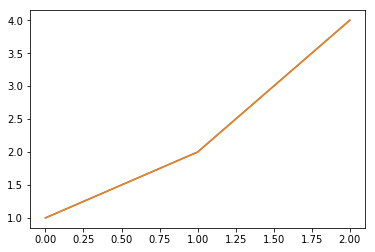

In [4]:
plt.plot([1,2,4])

# We have to tell matplotlib to "show" us the plot when we're finished
plt.show()

What I've done here is use the `plot` command to create a very simple line plot. We can see that the command has taken our list of values, `[1,2,4]` and used them to create the y-axis points, and automatically generated a list of x-axis values of `[0,1,2]`. 

But, this simple one-line command masks the fact that we've actually just generated a really complex heirarchy nested of Python objects, which can all be accessed and modified by us, the user. 

What this means is that each plot contains many different layers of objects, each of them linked in a tree-like pattern.

A basic representation of this object heirarchy can be seen below. In matplotlib, a `figure` actually represents the whole graphic. This graphic can have multiple subplots, and at this level we can do things like specify how large the want to overall image to be, the figure title, .

At the next level below that are the `axes`. We would typically think of these as the x-axis, or y-axis of a plot, but this is a misnomer. In matplotlib, the `axes` objects actually refer to each of the plots that exist within your overall figure. A single figure can have multiple different plots within it.



![Image Hierarchy](matplotlib.png)

Within your plot there are a bunch of different objects that can all be modified. This graphic below gives a basic overview of how to refer to each of these when looking for the relevant commands to modify them.

![Image Hierarchy](anatomy1.png)

Remember that we only can only ever manipulate **one** Figure or Axes object at a given time, and you don’t need to explicitly refer to it. If you have multiple subplots within your figure, then you will need to switch between different **axes** objects, or `ax`, to modify (or create) the different subplots in your figure.

## Matplotlib Plotting - how to create and access your Figure and Axes objects

To start, we need to create our figure and axes objects. This can be done with a simple command,   
`fig, ax = plt.subplots()`

As you might imagine, `subplots()` allows you specify how many different plots you want within your figure. As we didn't pass any arguments to `subplots()` here, the default call is `subplots(nrows=1, ncols=1)`. Consequently, ax is only a *single* AxesSubplot object:

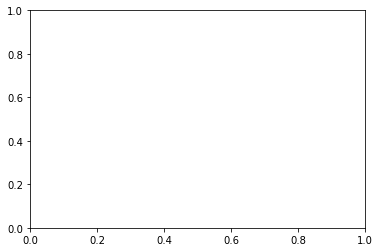

In [24]:
fig, ax = plt.subplots()

plt.show()


If we wanted to however, we could create multiple `axes` (_or plots_ - remember that! Axes = Plots) by simply giving `subplots` more arguments.

`fig, ax = plt.subplots(nrows = 1,ncols = 3)` would allow me to create a figure that contains a single row of plots, with 3 different plots in different columns.

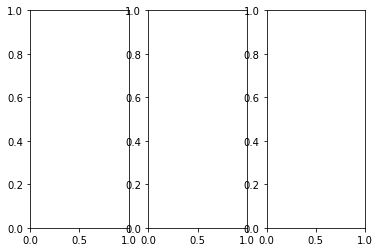

In [48]:
fig, (ax1, ax2, ax3) = plt.subplots(nrows = 1,ncols = 3) #, figsize=(12, 5)) #Can also specify the size of the figure!

plt.show()

What this has done here is created a Figure object and a 1x3 NumPy array of `Axes` objects.

Let's illustrate how you can manipulate your different `axes` using a stacked area graph of three time series:

array([6, 9, 4, 4, 9, 8, 0, 8, 2, 6, 3, 1, 6, 0, 6, 3, 7, 5, 6, 4, 6, 9, 1,
       8, 6, 8, 7, 3, 4, 8, 7, 8, 1, 2, 5, 4, 3, 4, 6, 7, 5, 9, 1, 5, 6, 9,
       1, 6, 1, 3])

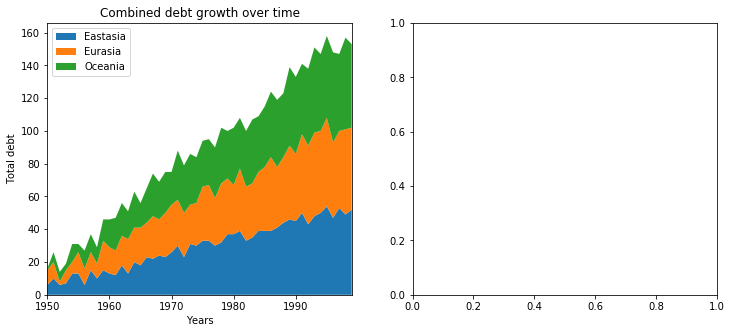

In [46]:
# Data
rng = np.arange(50)
rnd = np.random.randint(0, 10, size=(3, rng.size))
yrs = 1950 + rng

# Plotting
fig, (ax1, ax2)= plt.subplots(nrows = 1,ncols = 2, figsize=(12, 5)) #Can also specify the size of the figure!

# Make me a stacked area graph using yrs on the x-axis, rng + rnd as the Y-axis, 
# and label each stack with these names
ax1.stackplot(yrs, rng + rnd, labels=['Eastasia', 'Eurasia', 'Oceania'])

# Set the title of that plot
ax1.set_title('Combined debt growth over time')

# Create a legend, and tell it where to go
ax1.legend(loc='upper left')

# Set a label for the x- and y-axis
ax1.set_ylabel('Total debt')
ax1.set_xlabel('Years')

#Change the range of the x-axis so that there's no extra whitespace
ax1.set_xlim(xmin=yrs[0], xmax=yrs[-1])


plt.show()

Then, if I wanted to access the second Axes object to create a different graph, I can set the `ax` object to be my second plot using `ax = ax[1]`

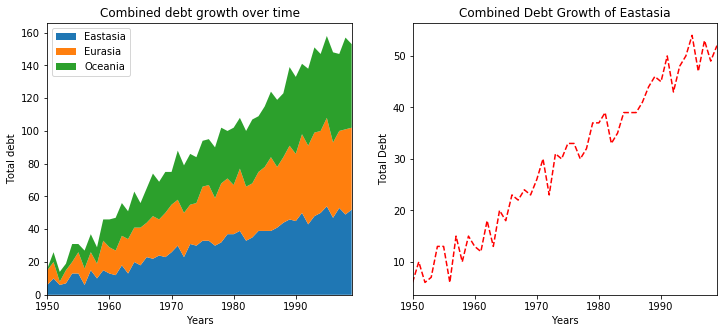

In [139]:
# Previous code
fig, (ax1, ax2) = plt.subplots(nrows = 1,ncols = 2, figsize=(12, 5))

ax1.stackplot(yrs, rng + rnd, labels=['Eastasia', 'Eurasia', 'Oceania'])
ax1.set_title('Combined debt growth over time')
ax1.legend(loc='upper left')
ax1.set_ylabel('Total debt')
ax1.set_xlabel('Years')
ax1.set_xlim(xmin=yrs[0], xmax=yrs[-1])

# New code
ax2.plot(yrs, rng + rnd[0], color = 'red', linewidth=1.5,ls = "--" )
ax2.set_title('Combined Debt Growth of Eastasia')
ax2.set_ylabel('Total Debt')
ax2.set_xlabel('Years')
ax2.set_xlim(xmin=yrs[0], xmax=yrs[-1])

plt.show()

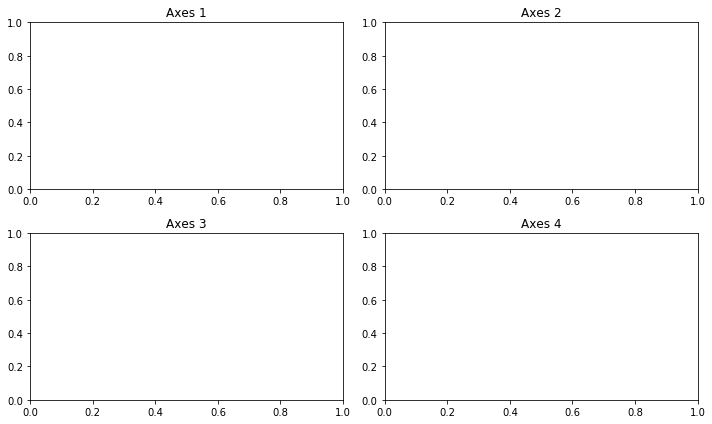

In [80]:
fig, ax = plt.subplots(nrows = 2,ncols = 2, figsize=(10, 6)) # now we have a 2x2 numpy axes array
ax1, ax2, ax3, ax4 = ax.flatten() #flattening the 2D array into a 1D array that we can now use like before

ax1.set_title("Axes 1")
ax2.set_title("Axes 2")
ax3.set_title("Axes 3")
ax4.set_title("Axes 4")

fig.tight_layout() #fit the subplots into the figure area (12,5)

plt.show()

## Plotting and Visualisations (with Pandas!)

Pandas has it's own in-built plotting commands to interface with the the dataframe structures. This is because matplotlib is desgined to work with numpy arrays, so when passing it array-like structures, such as a series object (Pandas column) or a numpy nd-array, it can occassionally cause issues. 

To get around this, Pandas has added it's own wrapper to the matplotlib package. Essentially , Pandas plotting is matplotlib plotting, but with commands that are structured slightly differently, and cross-compatibility with dataframes. 

Most plotting methods have a set of keyword arguments that control the layout and formatting of the returned plot. For each kind of plot (e.g. line, bar, scatter) any additional arguments keywords are passed along to the corresponding matplotlib function (ax.plot(), ax.bar(), ax.scatter()). These can be used to control additional styling, beyond what pandas provides

So, let's get into some data:

In [14]:
df = pd.read_csv("Automobile_price_data_clean.csv")

df.head()

,symboling,normalized-losses,make,fuel-type,aspiration,num-of-doors,body-style,drive-wheels,engine-location,wheel-base,...,engine-size,fuel-system,bore,stroke,compression-ratio,horsepower,peak-rpm,city-mpg,highway-mpg,price
0,3,?,alfa-romero,gas,std,two,convertible,rwd,front,88.6,...,130,mpfi,3.47,2.68,9.0,111,5000,21,27,13495
1,3,?,alfa-romero,gas,std,two,convertible,rwd,front,88.6,...,130,mpfi,3.47,2.68,9.0,111,5000,21,27,16500
2,1,?,alfa-romero,gas,std,two,hatchback,rwd,front,94.5,...,152,mpfi,2.68,3.47,9.0,154,5000,19,26,16500
3,2,164,audi,gas,std,four,sedan,fwd,front,99.8,...,109,mpfi,3.19,3.40,10.0,102,5500,24,30,13950
4,2,164,audi,gas,std,four,sedan,4wd,front,99.4,...,136,mpfi,3.19,3.40,8.0,115,5500,18,22,17450


In [15]:
df = pd.read_csv("Automobile_price_data_clean.csv", na_values= "?")

df.head()

,symboling,normalized-losses,make,fuel-type,aspiration,num-of-doors,body-style,drive-wheels,engine-location,wheel-base,...,engine-size,fuel-system,bore,stroke,compression-ratio,horsepower,peak-rpm,city-mpg,highway-mpg,price
0,3,NaN,alfa-romero,gas,std,two,convertible,rwd,front,88.6,...,130,mpfi,3.47,2.68,9.0,111,5000,21,27,13495
1,3,NaN,alfa-romero,gas,std,two,convertible,rwd,front,88.6,...,130,mpfi,3.47,2.68,9.0,111,5000,21,27,16500
2,1,NaN,alfa-romero,gas,std,two,hatchback,rwd,front,94.5,...,152,mpfi,2.68,3.47,9.0,154,5000,19,26,16500
3,2,164.0,audi,gas,std,four,sedan,fwd,front,99.8,...,109,mpfi,3.19,3.40,10.0,102,5500,24,30,13950
4,2,164.0,audi,gas,std,four,sedan,4wd,front,99.4,...,136,mpfi,3.19,3.40,8.0,115,5500,18,22,17450


In [16]:
df.dtypes

symboling              int64
normalized-losses    float64
make                  object
fuel-type             object
aspiration            object
num-of-doors          object
body-style            object
drive-wheels          object
engine-location       object
wheel-base           float64
length               float64
width                float64
height               float64
curb-weight            int64
engine-type           object
num-of-cylinders      object
engine-size            int64
fuel-system           object
bore                 float64
stroke               float64
compression-ratio    float64
horsepower             int64
peak-rpm               int64
city-mpg               int64
highway-mpg            int64
price                  int64
dtype: object

In [17]:
df.describe()

,symboling,normalized-losses,wheel-base,length,width,height,curb-weight,engine-size,bore,stroke,compression-ratio,horsepower,peak-rpm,city-mpg,highway-mpg,price
count,195.000000,160.000000,195.000000,195.000000,195.000000,195.000000,195.000000,195.000000,195.000000,195.000000,195.000000,195.000000,195.000000,195.000000,195.000000,195.000000
mean,0.794872,121.300000,98.896410,174.256923,65.886154,53.861538,2559.000000,127.938462,3.329385,3.250308,10.194974,103.271795,5099.487179,25.374359,30.841026,13248.015385
std,1.230612,35.602417,6.132038,12.476443,2.132484,2.396778,524.715799,41.433916,0.271866,0.314115,4.062109,37.869730,468.271381,6.401382,6.829315,8056.330093
min,-2.000000,65.000000,86.600000,141.100000,60.300000,47.800000,1488.000000,61.000000,2.540000,2.070000,7.000000,48.000000,4150.000000,13.000000,16.000000,5118.000000
25%,0.000000,94.000000,94.500000,166.300000,64.050000,52.000000,2145.000000,98.000000,3.150000,3.110000,8.500000,70.000000,4800.000000,19.500000,25.000000,7756.500000
50%,1.000000,114.000000,97.000000,173.200000,65.400000,54.100000,2414.000000,120.000000,3.310000,3.290000,9.000000,95.000000,5100.000000,25.000000,30.000000,10245.000000
75%,2.000000,148.000000,102.400000,184.050000,66.900000,55.650000,2943.500000,145.500000,3.590000,3.410000,9.400000,116.000000,5500.000000,30.000000,35.000000,16509.000000
max,3.000000,256.000000,120.900000,208.100000,72.000000,59.800000,4066.000000,326.000000,3.940000,4.170000,23.000000,262.000000,6600.000000,49.000000,54.000000,45400.000000


In [21]:
df.describe(include =  'all')

,symboling,normalized-losses,make,fuel-type,aspiration,num-of-doors,body-style,drive-wheels,engine-location,wheel-base,...,engine-size,fuel-system,bore,stroke,compression-ratio,horsepower,peak-rpm,city-mpg,highway-mpg,price
count,195.000000,160.000000,195,195,195,193,195,195,195,195.000000,...,195.000000,195,195.000000,195.000000,195.000000,195.000000,195.000000,195.000000,195.000000,195.000000
unique,NaN,NaN,21,2,2,2,5,3,2,NaN,...,NaN,7,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
top,NaN,NaN,toyota,gas,std,four,sedan,fwd,front,NaN,...,NaN,mpfi,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
freq,NaN,NaN,32,175,159,112,94,116,192,NaN,...,NaN,89,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
mean,0.794872,121.300000,NaN,NaN,NaN,NaN,NaN,NaN,NaN,98.896410,...,127.938462,NaN,3.329385,3.250308,10.194974,103.271795,5099.487179,25.374359,30.841026,13248.015385
std,1.230612,35.602417,NaN,NaN,NaN,NaN,NaN,NaN,NaN,6.132038,...,41.433916,NaN,0.271866,0.314115,4.062109,37.869730,468.271381,6.401382,6.829315,8056.330093
min,-2.000000,65.000000,NaN,NaN,NaN,NaN,NaN,NaN,NaN,86.600000,...,61.000000,NaN,2.540000,2.070000,7.000000,48.000000,4150.000000,13.000000,16.000000,5118.000000
25%,0.000000,94.000000,NaN,NaN,NaN,NaN,NaN,NaN,NaN,94.500000,...,98.000000,NaN,3.150000,3.110000,8.500000,70.000000,4800.000000,19.500000,25.000000,7756.500000
50%,1.000000,114.000000,NaN,NaN,NaN,NaN,NaN,NaN,NaN,97.000000,...,120.000000,NaN,3.310000,3.290000,9.000000,95.000000,5100.000000,25.000000,30.000000,10245.000000
75%,2.000000,148.000000,NaN,NaN,NaN,NaN,NaN,NaN,NaN,102.400000,...,145.500000,NaN,3.590000,3.410000,9.400000,116.000000,5500.000000,30.000000,35.000000,16509.000000


### Univariate Data

Univariate data is where we have a single variable, or column. Plotting this data can take a few forms - boxplots, histograms, bar charts, and violin plots being the most common.

#### Boxplots


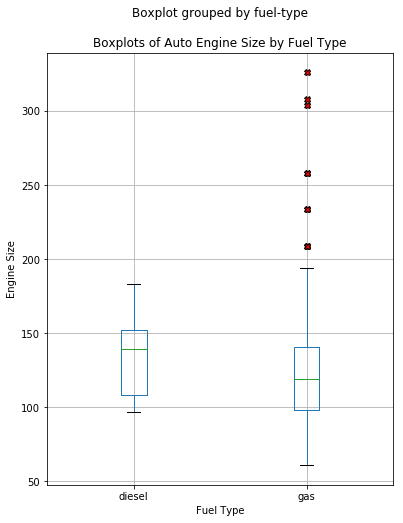

In [87]:
fig, ax = plt.subplots(figsize = (6,8))
outliers = dict(markerfacecolor='r', marker='X')


df[['engine-size','fuel-type']].boxplot(by = 'fuel-type', ax = ax, flierprops= outliers)#, vert = False)

ax.set_title("Boxplots of Auto Engine Size by Fuel Type") #title
ax.set_xlabel("Fuel Type") #x-axis label
ax.set_ylabel("Engine Size") #y-axis label

plt.show()


### Barplots

As bar plots are for categorical data the first step is create counts for your data that you are actually able to plot

In [88]:
counts = df['make'].value_counts() #find the count for each unique category
counts

toyota           32
nissan           18
mitsubishi       13
honda            13
mazda            13
subaru           12
volkswagen       12
volvo            11
peugot           11
dodge             9
mercedes-benz     8
bmw               8
plymouth          7
saab              6
audi              6
porsche           4
jaguar            3
chevrolet         3
alfa-romero       3
isuzu             2
mercury           1
Name: make, dtype: int64

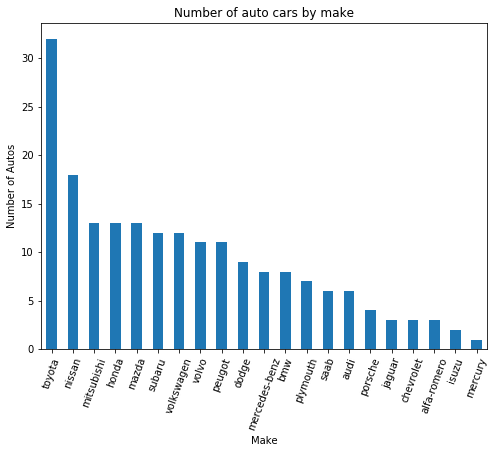

In [175]:
# Another way of creating your figure and axes objects
fig = plt.figure(figsize = (8,6))
ax = fig.gca() #defining axis

# Series.plot.bar - and on which axes we're plotting
counts.plot.bar(ax = ax)

ax.set_title("Number of auto cars by make") #title
ax.set_xlabel("Make") #x-axis label
ax.set_ylabel("Number of Autos") #y-axis label

plt.xticks(rotation=70)

plt.show()

### Histograms

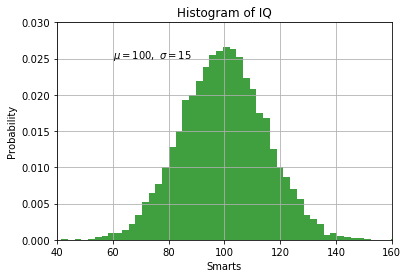

In [157]:
#Creating random data
mu, sigma = 100, 15
x = mu + sigma * np.random.randn(10000)

# the histogram of the data
n, bins, patches = plt.hist(x, 50, normed=1, facecolor='g', alpha=0.75)

fig = plt.gcf()
ax = plt.gca()


ax.set_xlabel('Smarts')
ax.set_ylabel('Probability')
ax.set_title('Histogram of IQ')
ax.text(60, .025, r'$\mu=100,\ \sigma=15$')

ax.axis([40, 160, 0, 0.03]) #[xmin, xmax, ymin, ymax]
ax.grid(True)

plt.show()

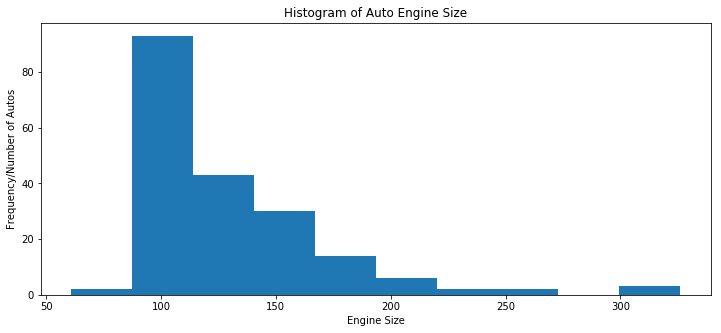

In [93]:
fig, ax = plt.subplots(figsize = (12,5))

df['engine-size'].plot.hist(ax = ax)#, bins = 30, alpha = 0.7)

ax.set_title("Histogram of Auto Engine Size") #title
ax.set_xlabel("Engine Size") #x-axis label
ax.set_ylabel("Frequency/Number of Autos") #y-axis label

plt.show()

### Bivariate data

Where you're plotting two variables against one another

### Line Plots

Plotting a line plots is as simple as using the `plot()` command on the back of whichever data you're trying to plot.

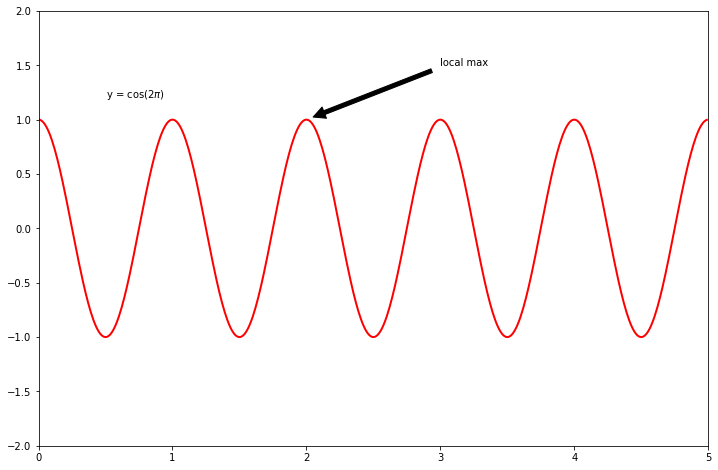

In [149]:
t = np.arange(0.0, 5.0, 0.01)
s = np.cos(2*np.pi*t)

fig, ax = plt.subplots(figsize = (12,8))

#creating the plot of t (x) vs s (y). You can specify line colour and shape using commands
# such as "r" for red. lw = line width
ax.plot(t,s, color = "r", lw=2)

#adding an arrow to the plot
plt.annotate('local max', xy=(2, 1), xytext=(3, 1.5),
            arrowprops=dict(facecolor='black', shrink=0.05))

#adding plot text
plt.text(0.5, 1.2, r'y = $\cos(2\pi)$')

#y-axis
ax.set_ylim(-2,2)
ax.set_xlim(0,5)

plt.show()

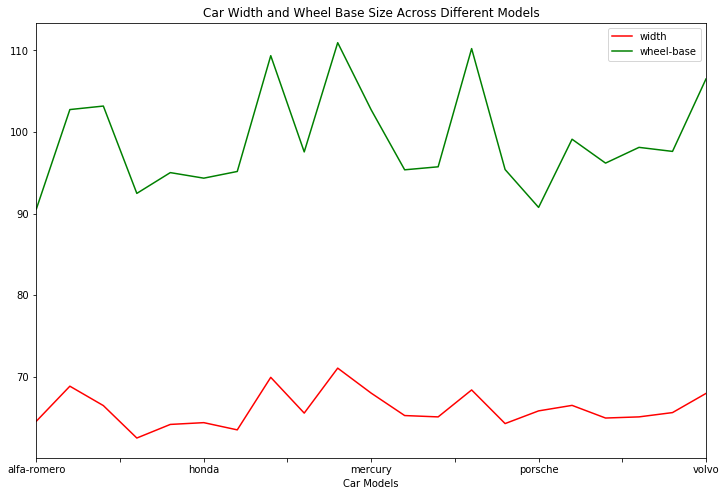

In [114]:
size = df[["width", "wheel-base","make"]].groupby(by = 'make').mean()

# Can specify the colours you want to be used (with US "color" spelling)
size.plot(figsize=(12, 8), color = ["red","green"]) # or use colormap if you have many labels

# Pandas can automatically create the figure and axes objects when you use the plot command
# To be able to access these to change various details though, you'll need to use the gca() and gcf() commands

# gcf = "get current figure"
fig = plt.gcf()
# gca = "get current axes"
ax = plt.gca()

ax.set_title("Car Width and Wheel Base Size Across Different Models")
ax.set_xlabel("Car Models")



In [116]:
df.head()

,symboling,normalized-losses,make,fuel-type,aspiration,num-of-doors,body-style,drive-wheels,engine-location,wheel-base,...,engine-size,fuel-system,bore,stroke,compression-ratio,horsepower,peak-rpm,city-mpg,highway-mpg,price
0,3,NaN,alfa-romero,gas,std,two,convertible,rwd,front,88.6,...,130,mpfi,3.47,2.68,9.0,111,5000,21,27,13495
1,3,NaN,alfa-romero,gas,std,two,convertible,rwd,front,88.6,...,130,mpfi,3.47,2.68,9.0,111,5000,21,27,16500
2,1,NaN,alfa-romero,gas,std,two,hatchback,rwd,front,94.5,...,152,mpfi,2.68,3.47,9.0,154,5000,19,26,16500
3,2,164.0,audi,gas,std,four,sedan,fwd,front,99.8,...,109,mpfi,3.19,3.40,10.0,102,5500,24,30,13950
4,2,164.0,audi,gas,std,four,sedan,4wd,front,99.4,...,136,mpfi,3.19,3.40,8.0,115,5500,18,22,17450


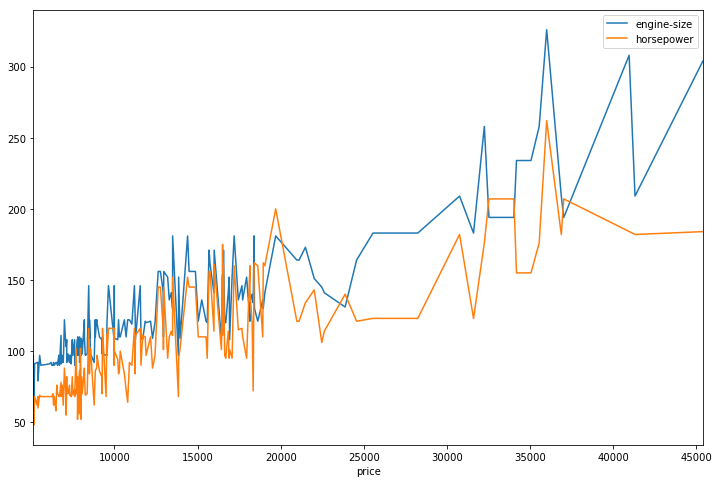

In [126]:
# Otherwise, you can use the original matplotlib commands to plot directly
cost = df[['price','engine-size','horsepower']].sort_values(by = 'price')

fig, ax = plt.subplots(figsize= (12,8))


cost.plot(x = 'price', y = "engine-size", ax = ax)
# Add another plot to the same plot
cost.plot(x = 'price', y = 'horsepower', ax = ax) # Still the same axes object as before

plt.show()

### Scatterplots

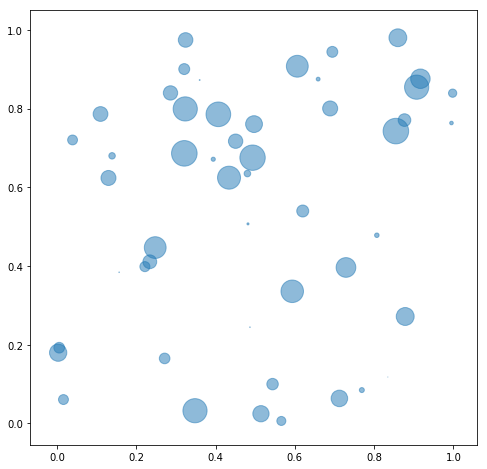

In [152]:
N = 50
x = np.random.rand(N)
y = np.random.rand(N)
# Creating area for the marker size 
area = np.pi * (15 * np.random.rand(N))**2 # 0 to 15 point radiuses

fig,ax = plt.subplots(figsize = (8,8))

plt.scatter(x, y, s=area, alpha=0.5)
plt.show()

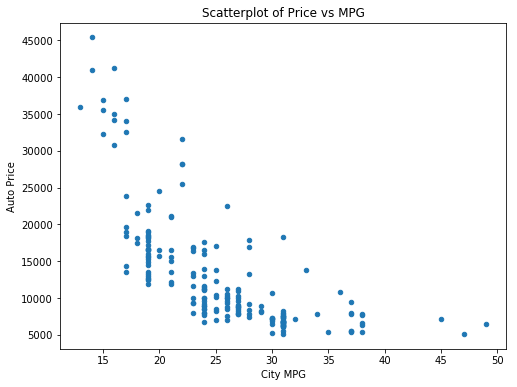

In [135]:
colx, coly = 'city-mpg', 'price'

fig = plt.figure(figsize = (8, 6))
ax = fig.gca() #defining axis

df.plot(kind = 'scatter', x = colx, y = coly, ax = ax) #, s = 50, marker = 'x')

ax.set_title("Scatterplot of Price vs MPG") #title
ax.set_xlabel("City MPG") #x-axis label
ax.set_ylabel("Auto Price") #y-axis label


# # Add correlation line - IFF IT'S A LINEAR RELATIONSHIP
# axes = plt.gca()
# m, b = np.polyfit(df[colx], df[coly], 1)
# X_plot = np.linspace(axes.get_xlim()[0],axes.get_xlim()[1],100)
# plt.plot(X_plot, m*X_plot + b, '-')

plt.show()


### XKCD Style Plots - for a bit of fun

Source: https://matplotlib.org/users/screenshots.html#bar-charts

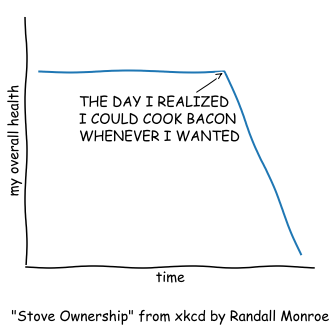

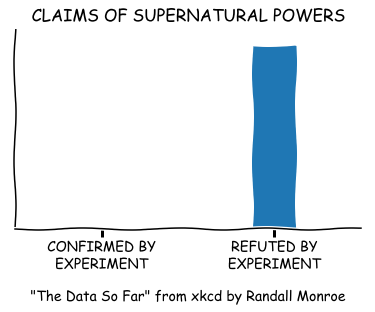

In [171]:
with plt.xkcd():
    # Based on "Stove Ownership" from XKCD by Randall Monroe
    # http://xkcd.com/418/

    fig = plt.figure(facecolor=[1, 1, 1], figsize = (5,5))
    
    ax = fig.add_axes((0.1, 0.2, 0.8, 0.7))
    ax.spines['right'].set_color('none')
    ax.spines['top'].set_color('none')
    plt.xticks([])
    plt.yticks([])
    ax.set_ylim([-30, 10])

    data = np.ones(100)
    data[70:] -= np.arange(30)

    plt.annotate(
        'THE DAY I REALIZED\nI COULD COOK BACON\nWHENEVER I WANTED',
        xy=(70, 1), arrowprops=dict(arrowstyle='->'), xytext=(15, -10))

    plt.plot(data)

    plt.xlabel('time')
    plt.ylabel('my overall health')
    fig.text(
        0.5, 0.05,
        '"Stove Ownership" from xkcd by Randall Monroe',
        ha='center')

        # Based on "The Data So Far" from XKCD by Randall Monroe
    # http://xkcd.com/373/

    fig = plt.figure(facecolor=[1, 1, 1] )
    ax = fig.add_axes((0.1, 0.2, 0.8, 0.7))
    ax.bar([0, 1], [0, 100], 0.25)
    ax.spines['right'].set_color('none')
    ax.spines['top'].set_color('none')
    ax.xaxis.set_ticks_position('bottom')
    ax.set_xticks([0, 1])
    ax.set_xlim([-0.5, 1.5])
    ax.set_ylim([0, 110])
    ax.set_xticklabels(['CONFIRMED BY\nEXPERIMENT', 'REFUTED BY\nEXPERIMENT'])
    plt.yticks([])

    plt.title("CLAIMS OF SUPERNATURAL POWERS")

    fig.text(
        0.5, -0.05,
        '"The Data So Far" from xkcd by Randall Monroe',
        ha='center')
    
plt.show()



## Challenge

**Create your own, pretty plots with as many different customisations as you can find. You can find many of these on the MPL cheatsheets you've been given (and on the Github)

#### External Resources

**Tutorials**:
- https://realpython.com/python-matplotlib-guide/
- https://matplotlib.org/tutorials/introductory/pyplot.html
- https://matplotlib.org/tutorials/index.html
- https://www.datacamp.com/community/tutorials/matplotlib-tutorial-python

**Documentation**
- [Matplotlib FAQ Page](https://matplotlib.org/faq/usage_faq.html)
- [User Guide](https://matplotlib.org/users/)
- [Pandas Visualisation Tools](https://pandas.pydata.org/pandas-docs/stable/visualization.html)
- [Matplotlib Gallery](https://matplotlib.org/gallery.html)

